# Tutorial: Sit to Stand and Stand to Sit Detection

**Author:** Masoud Abedinifar

**Last update:** Fri 16 Feb 2024

## Learning objectives
By the end of this tutorial:
- You can load data from a recording that belongs to one of the available datasets,
- Apply the Pham Sit to Stand and Stand to Sit Detection algorithm.
- Interpret the detected postural transitions for further analysis.

## Import libraries
The necessary libraries such as numpy, matplotlib.pyplot, and dataset are imported. Make sure that you have all the required libraries and modules installed before running this code. You also may need to install the 'ngmt' library and its dependencies if you haven't already.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ngmt.datasets import keepcontrol
from ngmt.modules.ssd import PhamSittoStandStandtoSitDetection
from ngmt.config import cfg_colors

## Data Preparation

To implement Sit to Stand and Stand to Sit Detection algorithm, we load example data.


In [2]:
# The 'file_path' variable holds the absolute path to the data file
file_path = (
    r"\\uni-kiel.de\files\bigprojects\neurogeriatrics_data\Keep Control\Data\lab dataset\rawdata\sub-pp132\motion\sub-pp132_task-homePart1_tracksys-imu_motion.tsv"
)

In [3]:
# In this example, we use "imu" as tracking_system and "pelvis" as tracked points.
tracking_sys = "imu"
tracked_points = {tracking_sys: ["pelvis"]}

In [4]:
# The 'keepcontrol.load_recording' function is used to load the data from the specified file_path
recording = keepcontrol.load_recording(
    file_name=file_path, tracking_systems=[tracking_sys], tracked_points=tracked_points
)

# Print recording data
print(f"Recording: {recording}")

Recording: NGMTRecording(data={'imu':        pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z  pelvis_ANGVEL_x  \
0          0.978029     -0.019527     -0.247560        -1.141052   
1          0.969258     -0.031258     -0.250003        -0.438866   
2          0.980933     -0.013662     -0.248552        -0.614413   
3          0.978029     -0.021959     -0.251951        -0.175546   
4          0.974592     -0.022460     -0.248056        -1.228825   
...             ...           ...           ...              ...   
35546      0.950709     -0.041021     -0.292491         0.351093   
35547      0.966769     -0.031723     -0.292491         0.438866   
35548      0.960961     -0.033690     -0.304210         0.614413   
35549      0.952664     -0.046386     -0.305662         0.263320   
35550      0.959954     -0.036122     -0.303715         0.351093   

       pelvis_ANGVEL_y  pelvis_ANGVEL_z  pelvis_MAGN_x  pelvis_MAGN_y  \
0             0.176128        -0.437972       0.629168      -0.321284   

In [5]:
# Load lower back acceleration data
acceleration_data = recording.data[tracking_sys][
    ["pelvis_ACC_x", "pelvis_ACC_y", "pelvis_ACC_z"]
]

# Print acceleration data
print(f"acceleration_data (g): {acceleration_data}")

acceleration_data (g):        pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z
0          0.978029     -0.019527     -0.247560
1          0.969258     -0.031258     -0.250003
2          0.980933     -0.013662     -0.248552
3          0.978029     -0.021959     -0.251951
4          0.974592     -0.022460     -0.248056
...             ...           ...           ...
35546      0.950709     -0.041021     -0.292491
35547      0.966769     -0.031723     -0.292491
35548      0.960961     -0.033690     -0.304210
35549      0.952664     -0.046386     -0.305662
35550      0.959954     -0.036122     -0.303715

[35551 rows x 3 columns]


In [6]:

# Load lower back gyro data
gyro_data = recording.data[tracking_sys][
    ["pelvis_ANGVEL_x", "pelvis_ANGVEL_y", "pelvis_ANGVEL_z"]
]

# Print gyro data
print(f"gyro_data (deg/s): {gyro_data}")

gyro_data (deg/s):        pelvis_ANGVEL_x  pelvis_ANGVEL_y  pelvis_ANGVEL_z
0            -1.141052         0.176128        -0.437972
1            -0.438866        -0.347496        -0.525567
2            -0.614413         0.437940        -0.262783
3            -0.175546        -0.261812         0.350378
4            -1.228825         0.437940         0.000000
...                ...              ...              ...
35546         0.351093        -0.176128         0.437972
35547         0.438866         0.347496         0.000000
35548         0.614413         0.000000         0.437972
35549         0.263320        -0.347496        -0.525567
35550         0.351093         0.347496        -0.087594

[35551 rows x 3 columns]


In [7]:
# Get the corresponding sampling frequency directly from the recording
sampling_frequency = recording.channels[tracking_sys][
    recording.channels[tracking_sys]["name"] == "pelvis_ACC_x"
]["sampling_frequency"].values[0]

# Print sampling frequency and its type
print(f"sampling frequency: {sampling_frequency} Hz")
print(f"type of sampling frequency: {type(sampling_frequency)}")

sampling frequency: 200 Hz
type of sampling frequency: <class 'numpy.int64'>


## Visualisation of the Data
The raw acceleration and gyro data including components of x, y and z axis are plotted.

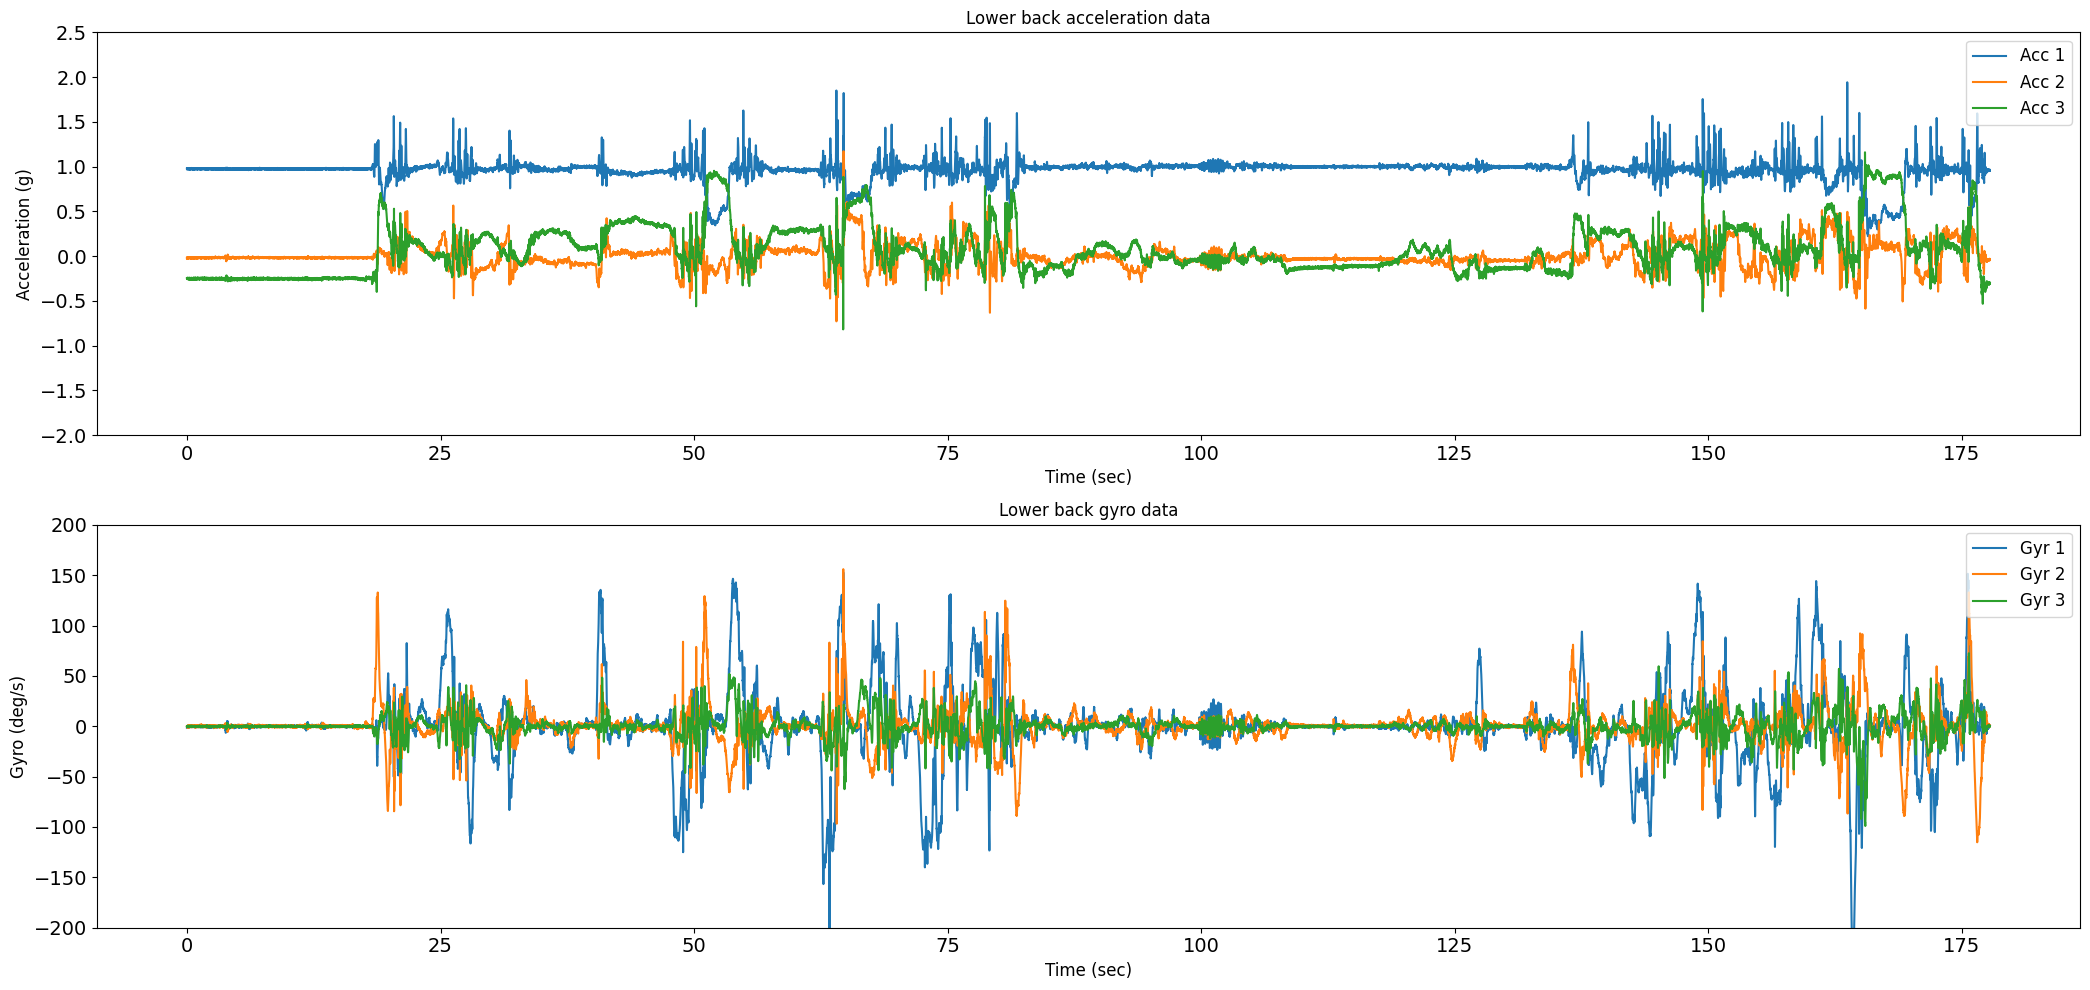

In [8]:
# Plot acceleration and gyro in subplots
fig = plt.figure(figsize=(21, 10))

# Subplot 1: Acceleration data
ax1 = plt.subplot(211)
for i in range(3):
    ax1.plot(
        np.arange(len(acceleration_data)) / sampling_frequency,
        acceleration_data[f"pelvis_ACC_{chr(120 + i)}"],
        label=f"Acc {i + 1}",
    )
ax1.set_title("Lower back acceleration data")
ax1.set_ylabel(f"Acceleration (g)", fontsize=12)
ax1.set_xlabel(f"Time (sec)", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)
ax1.set_ylim(-2, 2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 2: Gyro data
ax2 = plt.subplot(212)
for i in range(3):
    ax2.plot(
        np.arange(len(gyro_data)) / sampling_frequency,
        gyro_data[f"pelvis_ANGVEL_{chr(120 + i)}"],
        label=f"Gyr {i + 1}",
    )
ax2.set_title("Lower back gyro data")
ax2.set_ylabel(f"Gyro (deg/s)", fontsize=12)
ax2.set_xlabel(f"Time (sec)", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)
ax2.set_ylim(-200, 200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.show()


## Applying pham sit to stand and stand to sit detection algorithm
Now, we are running pham sit to stand and stand to sit detection algorithm from pham module [`NGMT.ngmt.modules.ssd._pham.SittoStandStandtoSitDetection`](https://github.com/neurogeriatricskiel/NGMT/tree/main/ngmt/modules/ssd/_pham.py) to detect sit to stand and stand to sit. The inputs consist of accelerometer and gyroscope data (N, 6) for the x, y, and z axes, the initial sampling frequency of the data.

In [9]:
# Put acceleration and gyro data in the input data as pandas Dataframe which will be used as input of the algorithm
input_data = [acceleration_data, gyro_data]

# Concatenate acceleration_data and gyro_data along axis=1 (columns)
input_data = pd.concat([acceleration_data, gyro_data], axis=1)

# Print input data and its type
print(f"input data: {input_data}")

input data:        pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z  pelvis_ANGVEL_x  \
0          0.978029     -0.019527     -0.247560        -1.141052   
1          0.969258     -0.031258     -0.250003        -0.438866   
2          0.980933     -0.013662     -0.248552        -0.614413   
3          0.978029     -0.021959     -0.251951        -0.175546   
4          0.974592     -0.022460     -0.248056        -1.228825   
...             ...           ...           ...              ...   
35546      0.950709     -0.041021     -0.292491         0.351093   
35547      0.966769     -0.031723     -0.292491         0.438866   
35548      0.960961     -0.033690     -0.304210         0.614413   
35549      0.952664     -0.046386     -0.305662         0.263320   
35550      0.959954     -0.036122     -0.303715         0.351093   

       pelvis_ANGVEL_y  pelvis_ANGVEL_z  
0             0.176128        -0.437972  
1            -0.347496        -0.525567  
2             0.437940        -0.262783  
3  

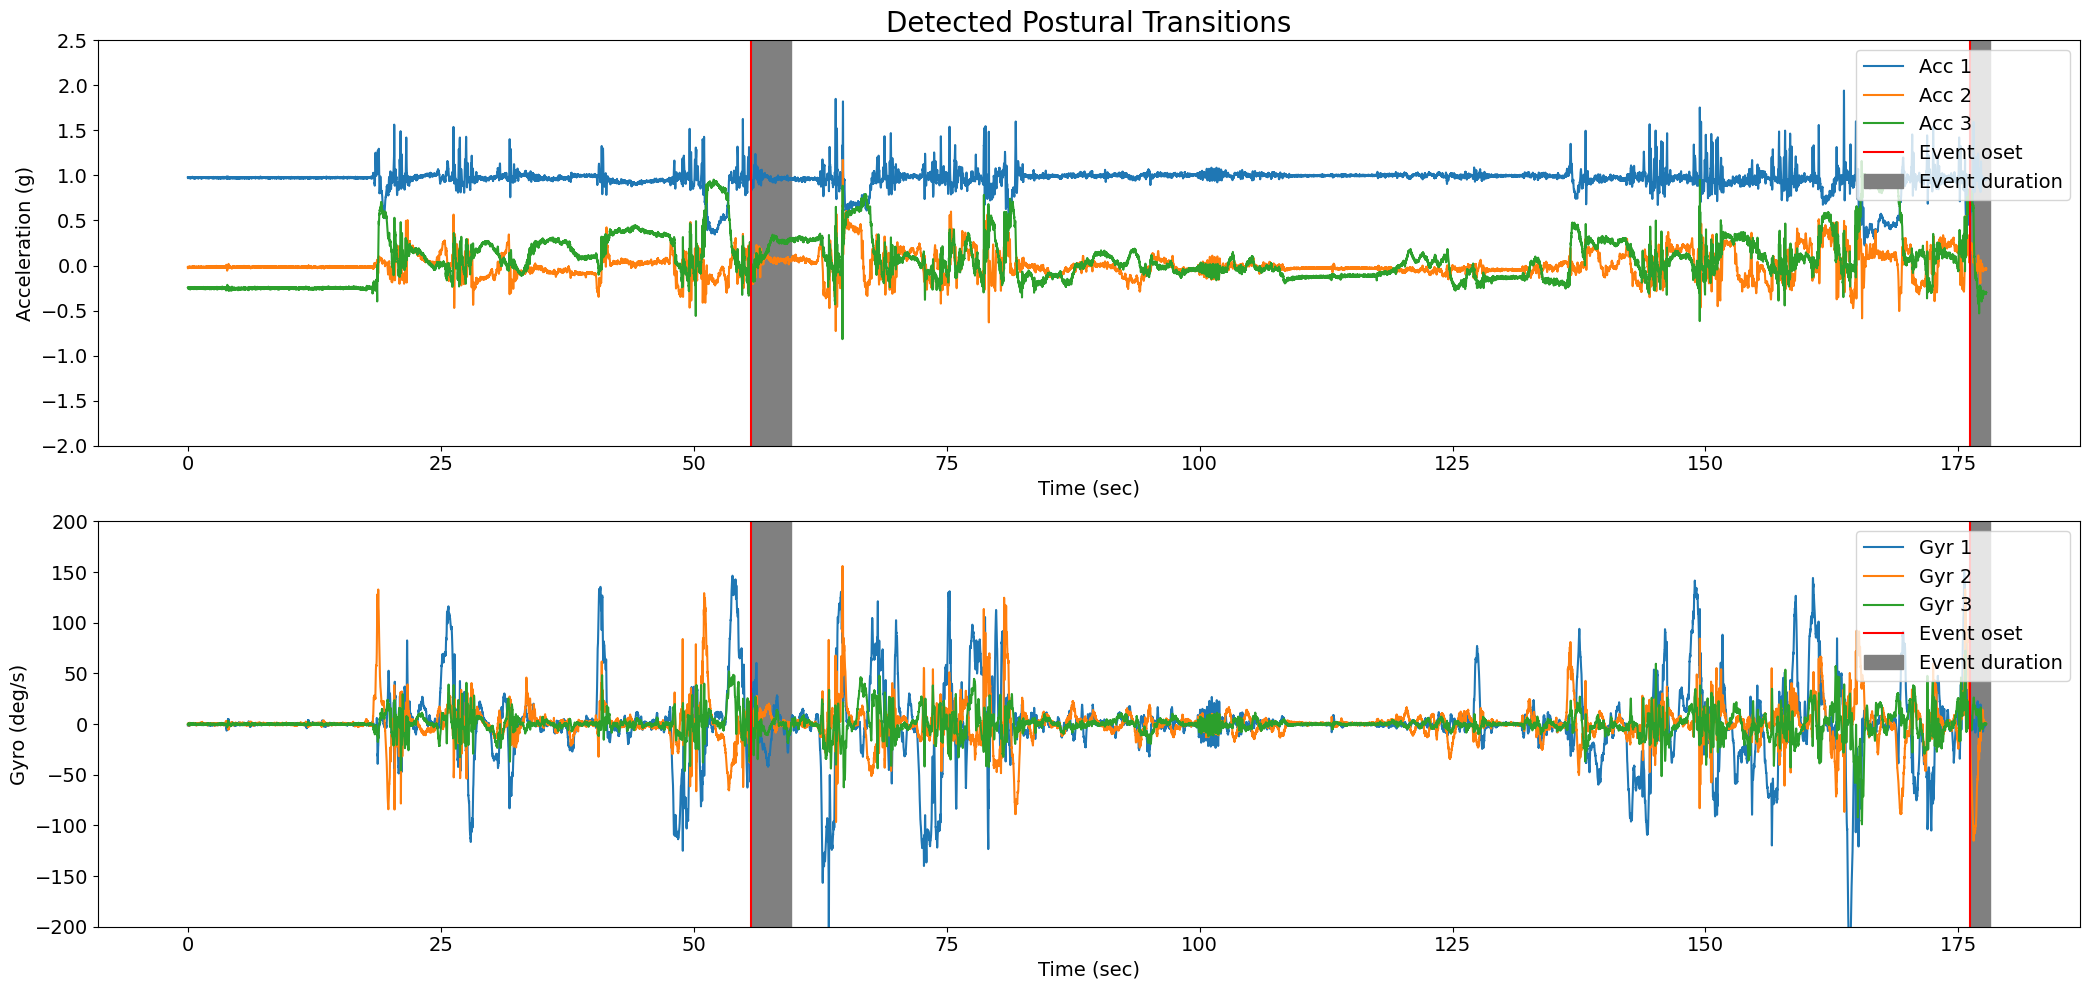

pt_events:      onset  duration    event_type  postural transition angle  \
0   55.695     3.890  sit to stand                  71.327425   
1  176.120     1.995  stand to sit                  44.572750   

   maximum flexion velocity  maximum extension velocity tracking_systems  \
0                        65                          12              imu   
1                       132                         115              imu   

  tracked_points  
0      LowerBack  
1      LowerBack  


In [10]:
# Create an instance of the PhamSittoStandStandtoSitDetection class
pham = PhamSittoStandStandtoSitDetection()

# Call the sit to satnd and stand to sit detection using pham.detect
pham = pham.detect(
    data=input_data, sampling_freq_Hz=sampling_frequency
)

# Print events and their corresponding information
pt_events = pham.postural_transitions_
print(f"pt_events: {pt_events}")

## Detailed Visualization of the Detected Postural Transitions

To get a better understanding of the results, we can plot the data and the first detected postural transition (here is sit to stand). The red vertical line shows the onset and the grey area shows the duration of the first postural transition.

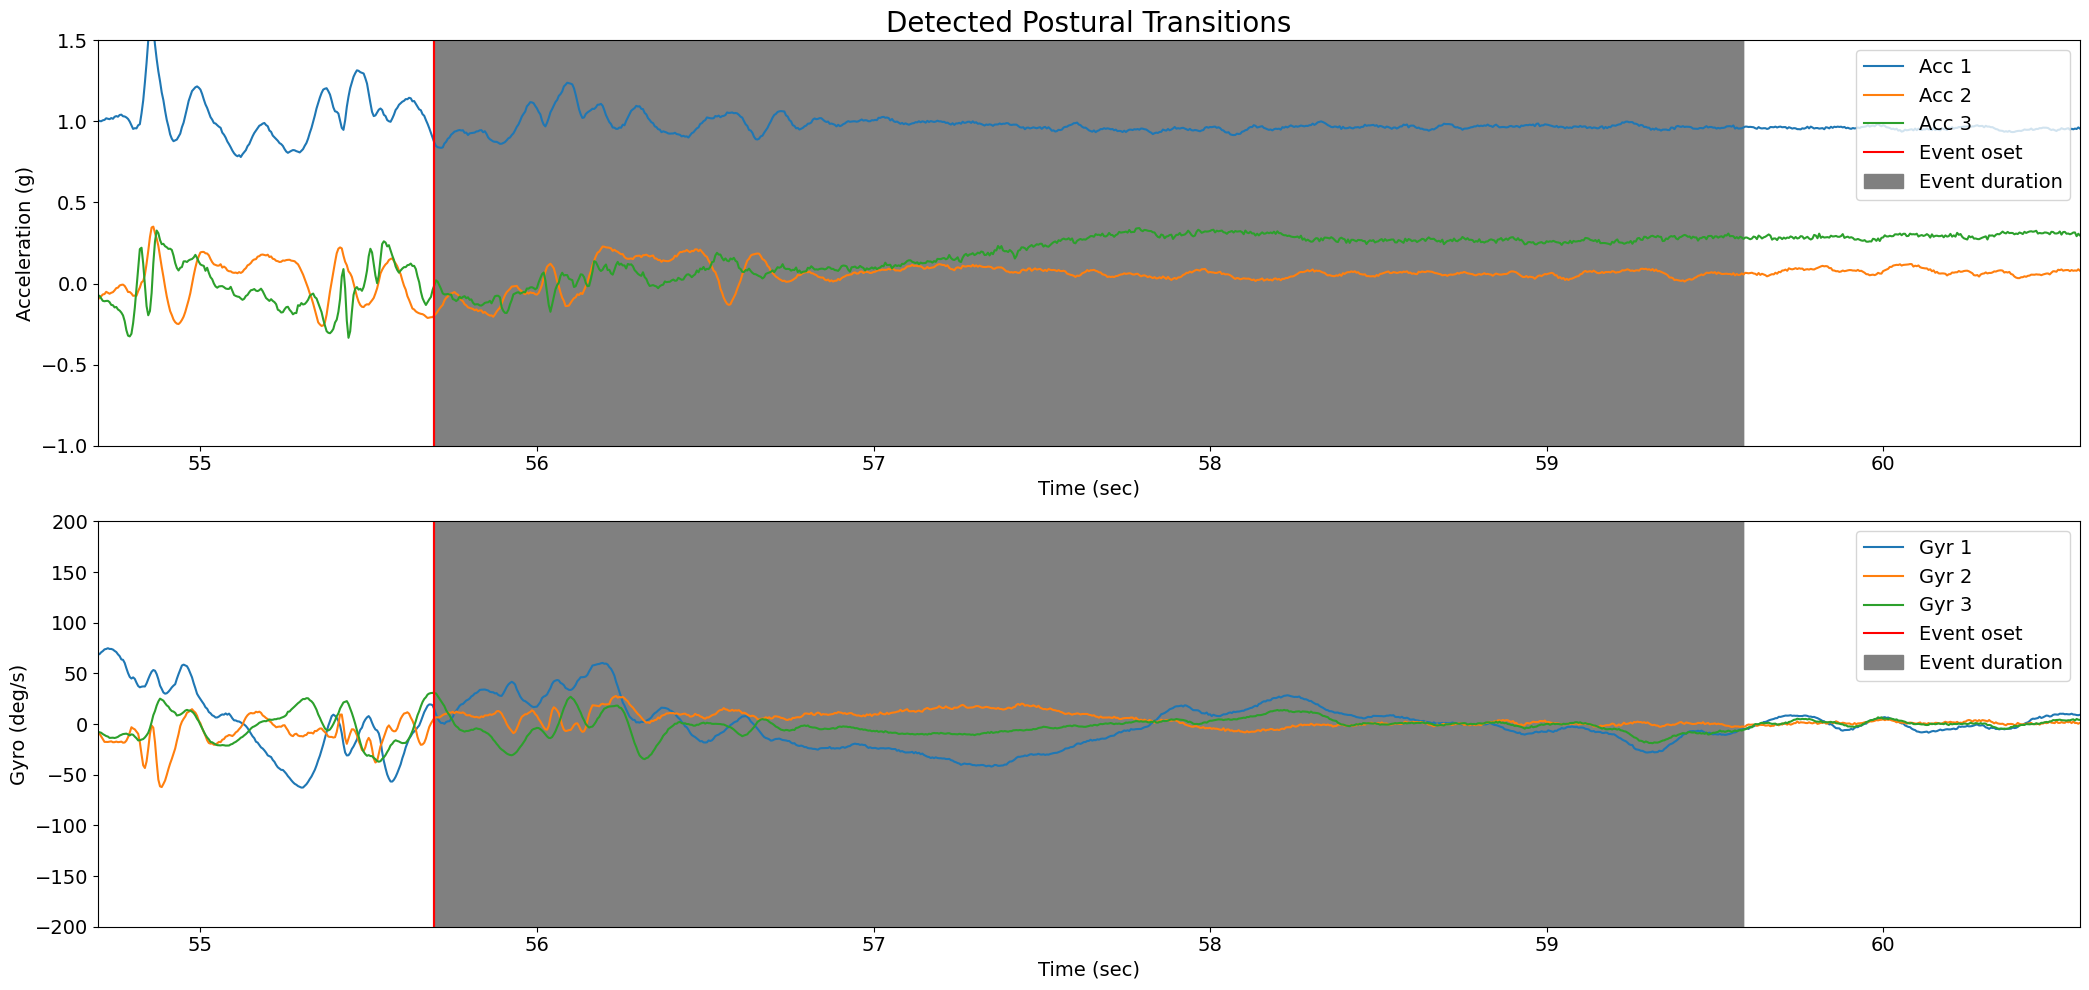

In [11]:
# Figure 
fig = plt.figure(figsize=(21, 10))

# Subplot 1: Acceleration data
ax1 = plt.subplot(211)
for i in range(3):
    ax1.plot(
        np.arange(len(acceleration_data)) / sampling_frequency,
        acceleration_data[f"pelvis_ACC_{chr(120 + i)}"],
    )
for i in range(len(pt_events)):
    onset = pt_events['onset'][0]
    duration = pt_events['duration'][0]
    ax1.axvline(x=onset, color='r')
    ax1.axvspan(onset, (onset + duration), color='grey')
ax1.set_title("Detected Postural Transitions", fontsize=20)
ax1.set_ylabel(f"Acceleration (g)", fontsize=14)
ax1.set_xlabel(f"Time (sec)", fontsize=14)
ax1.legend(["Acc 1", "Acc 2", "Acc 3", "Event oset", "Event duration"], loc="upper right", fontsize=14)
ax1.set_ylim(-1, 1.5)
start_limit = pt_events["onset"][0] - 1
end_limit = pt_events["onset"][0] + pt_events["duration"][0] + 1
ax1.set_xlim(start_limit, end_limit)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 2: Gyro data
ax2 = plt.subplot(212)
for i in range(3):
    ax2.plot(
        np.arange(len(gyro_data)) / sampling_frequency,
        gyro_data[f"pelvis_ANGVEL_{chr(120 + i)}"],
    )
for i in range(len(pt_events)):
    onset = pt_events['onset'][0]
    duration = pt_events['duration'][0]
    ax2.axvline(x=onset, color='r')
    ax2.axvspan(onset, (onset + duration), color='grey')
ax1.set_title("Detected Postural Transitions", fontsize=20)
ax2.set_ylabel(f"Gyro (deg/s)", fontsize=14)
ax2.set_xlabel(f"Time (sec)", fontsize=14)
start_limit = pt_events["onset"][0] - 1
end_limit = pt_events["onset"][0] + pt_events["duration"][0] + 1
ax2.set_xlim(start_limit, end_limit)
ax2.legend(["Gyr 1", "Gyr 2", "Gyr 3", "Event oset", "Event duration"], loc="upper right", fontsize=14)
ax2.set_ylim(-200, 200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.show()